# **Predictive Maintenance and Condition-Based Monitoring (CBM) for Maritime Drive System Using Machine Learning Techniques**

## Table of Contents

<a id='table_of_contents'></a>

0. [Introduction](#intro)
1. [Import libraries](#imports)
2. [Import data](#import_data)
3. [Data exploration & cleaning](#data_exploration)<br>
4. [Feature Engineering](#feature_engineering)<br>
5. [Data preparation](#data_preparation)<br>
6. [Model training](#model_training)<br>
        6.1 [Linear Regression](#lr)<br>
        6.2 [DecisionTreeRegressor](#dt)<br>
        6.3 [RandomForestRegressor](#rf)<br>
        6.4 [GradientBoostingRegressor](#gb)<br>
        6.5 [AdaBoostRegressor](#ada)<br>
        6.6 [XGBoostRegressor](#xgb)<br>
7. [Result Evaluation & Conclusion](#res)<br>

# 0. Introduction <a id='intro'></a>
[Back to top](#table_of_contents)

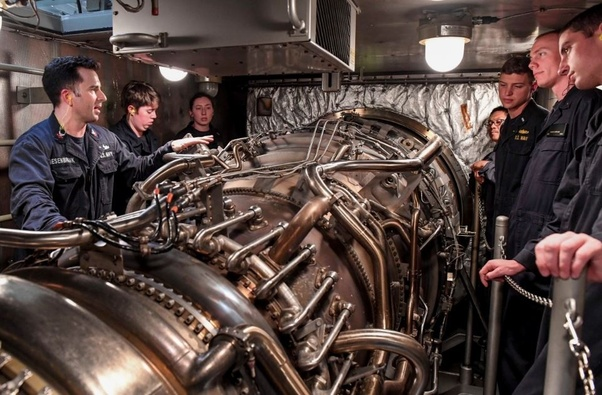

### Problem Statement

- This dataset records operational performance metrics of a ship's gas turbine propulsion system.
- Each row represents a set of measurements taken under specific conditions, likely at different times or operational states.
- The parameters captured include various torque measurements, rates of revolutions, temperatures, pressures, fuel flow, and state coefficients.
- These metrics are crucial for monitoring and analyzing the propulsion system's performance, efficiency, and maintenance needs.
- The data can be used for predictive maintenance, performance optimization, and anomaly detection.
- By analyzing the relationship between these parameters, one can identify patterns that indicate potential issues or areas for improvement in the propulsion system.

### Data Description
- **Lever position(measure in RPM-Low to High)**: Position of the ship's lever (range: 1.138 to 9.3).
- **Ship speed (v)**: Speed of the ship, likely in knots (range: 3 to 27).
- **Gas Turbine (GT) shaft torque (GTT)**: Torque on the gas turbine shaft in kN m (range: 289.964 to 72763.329).
- **GT rate of revolutions (GTn)**: Revolutions per minute (rpm) of the gas turbine (range: 1349.489 to 3560.395).
- **Gas Generator rate of revolutions (GGn)**: Revolutions per minute (rpm) of the gas generator (range: 6677.38 to 9778.528).
- **Starboard Propeller Torque (Ts)**: Torque on the starboard propeller in kN (range: 7.584 to 644.905).
- **Port Propeller Torque (Tp)**: Torque on the port propeller in kN (range: 7.584 to 644.905).
- **High Pressure (HP) Turbine exit temperature (T48)**: Temperature at the exit of the high-pressure turbine in Celsius (range:464.006 to 1115.797000).
- **GT Compressor inlet air temperature (T1)**: Temperature of inlet air to the gas turbine compressor in Celsius (constant at 288).
- **GT Compressor outlet air temperature (T2)**: Temperature of outlet air from the gas turbine compressor in Celsius (range:s550.563 to 789.094).
- **HP Turbine exit pressure (P48)**: Pressure at the exit of the high-pressure turbine in bar (range: 1.096 to 4.498).
- **GT Compressor inlet air pressure (P1)**: Pressure of inlet air to the gas turbine compressor in bar 
(constant at 0.998).
- **GT Compressor outlet air pressure (P2)**: Pressure of outlet air from the gas turbine compressor in the bar (range: 5.947 to 22.811).
- **GT exhaust gas pressure (Pexh)**: Pressure of exhaust gas from the gas turbine in the bar (range: 1.019 to 1.049).
- **Turbine Injection Control (TIC)**: Control parameter for turbine injection in percentage (range: 3.879 to 92.556).
- **Fuel flow (mf)**: Rate of fuel flow into the gas turbine in kg/s (range: 0.079 to 1.832).
- **GT Compressor decay state coefficient** : Coefficient related to the decay state of the compressor(range: 0.95 to 1)
- **GT Turbine decay state coefficient**: Coefficient related to the decay state of the gas turbine(range: 0.975 to 1). (Note- usually a drop of 5-10% in efficiency might be considered critical for gas turbines

# 1. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import plotly.express as px
from math import sqrt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style="darkgrid")
warnings.filterwarnings('ignore')

# 2. Import data <a id='import_data'></a>
[Back to top](#table_of_contents)

In [3]:
data =  pd.read_csv('Conditional_Base_Monitoring in Marine_System.csv')
data.head()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,5.14,15,21640.162,1924.358,8516.691,175.324,175.324,706.702,288,640.873,2.072,0.998,10.916,1.026,24.96,0.494,0.951,1
1,9.3,27,72776.229,3560.412,9759.837,645.137,645.137,1060.156,288,774.302,4.511,0.998,22.426,1.051,87.741,1.737,0.982,0.997
2,8.206,24,50994.673,3087.535,9313.854,438.11,438.11,927.728,288,734.474,3.577,0.998,18.412,1.041,60.546,1.199,0.966,0.988
3,5.14,15,21626.805,1924.329,8472.097,175.221,175.221,695.477,288,633.124,2.086,0.998,11.074,1.027,24.549,0.486,0.989,0.991
4,5.14,15,21636.43,1924.313,8494.777,NaN,NaN,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


# 3. Data exploration & cleaning <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [4]:
data.shape

(12434, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12434 entries, 0 to 12433
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Lever position                                            12387 non-null  object
 1   Ship speed (v)                                            12374 non-null  object
 2   Gas Turbine (GT) shaft torque (GTT) [kN m]                12390 non-null  object
 3   GT rate of revolutions (GTn) [rpm]                        12383 non-null  object
 4   Gas Generator rate of revolutions (GGn) [rpm]             12389 non-null  object
 5   Starboard Propeller Torque (Ts) [kN]                      12385 non-null  object
 6   Port Propeller Torque (Tp) [kN]                           12377 non-null  object
 7   Hight Pressure (HP) Turbine exit temperature (T48) [C]    12371 non-null  object
 8   GT Compressor inlet air te

In [6]:
data.isnull().sum()

Lever position                                              47
Ship speed (v)                                              60
Gas Turbine (GT) shaft torque (GTT) [kN m]                  44
GT rate of revolutions (GTn) [rpm]                          51
Gas Generator rate of revolutions (GGn) [rpm]               45
Starboard Propeller Torque (Ts) [kN]                        49
Port Propeller Torque (Tp) [kN]                             57
Hight Pressure (HP) Turbine exit temperature (T48) [C]      63
GT Compressor inlet air temperature (T1) [C]                58
GT Compressor outlet air temperature (T2) [C]               46
HP Turbine exit pressure (P48) [bar]                        48
GT Compressor inlet air pressure (P1) [bar]                 59
GT Compressor outlet air pressure (P2) [bar]                43
GT exhaust gas pressure (Pexh) [bar]                        55
Turbine Injecton Control (TIC) [%]                          61
Fuel flow (mf) [kg/s]                                  

In [7]:
(data.isnull().sum().sum()/data.size)*100

0.4083784604936286

In [8]:
data.duplicated().sum()

43

#### Observation
-  There are 12434 rows and 18 columns
-  Data is recorded as type Object, needs to converted to number format for further analysis and visualisation
-  0.4 % data is missing.
-  43 duplicate records found.

### converting Object type to number 

In [9]:
def clean_convert(column):
    column = column.str.replace(',', '.')
    column = column.apply(lambda x: re.sub(r'[^0-9.-]', '', x) if isinstance(x, str) else x)
    return pd.to_numeric(column, errors='coerce')

In [10]:
for col in data.columns:
    data[col] = clean_convert(data[col])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12434 entries, 0 to 12433
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Lever position                                            12386 non-null  float64
 1   Ship speed (v)                                            12372 non-null  float64
 2   Gas Turbine (GT) shaft torque (GTT) [kN m]                12384 non-null  float64
 3   GT rate of revolutions (GTn) [rpm]                        12372 non-null  float64
 4   Gas Generator rate of revolutions (GGn) [rpm]             12384 non-null  float64
 5   Starboard Propeller Torque (Ts) [kN]                      12385 non-null  float64
 6   Port Propeller Torque (Tp) [kN]                           12376 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature (T48) [C]    12368 non-null  float64
 8   GT Compressor in

In [12]:
data.describe()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,12386.000000,12372.000000,12384.000000,12372.000000,12384.000000,12385.000000,12376.000000,12368.000000,12376.0,12386.000000,12384.000000,1.237400e+04,12391.000000,12377.000000,12370.000000,12399.000000,12393.000000,12381.000000
mean,5.091730,14.784433,26632.756020,2114.424254,8170.998705,221.744977,221.994547,731.273808,288.0,644.354205,2.322415,9.980000e-01,12.145135,1.029175,32.983910,0.648773,0.974074,0.987049
std,2.620855,7.732232,22016.571741,769.834762,1090.006471,199.224496,199.154902,172.865123,0.0,72.231525,1.078328,2.588034e-13,5.306440,0.010332,25.643388,0.503076,0.015197,0.007724
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8375.514500,1386.756750,7051.261000,60.313000,60.314000,590.040500,288.0,578.199500,1.388000,9.980000e-01,7.437000,1.020000,12.954250,0.246000,0.961000,0.980000
50%,5.140000,15.000000,21628.967500,1924.320000,8477.073500,175.255000,175.256000,703.211500,288.0,635.803500,2.080000,9.980000e-01,11.061000,1.026000,25.130000,0.493000,0.974000,0.987000
75%,7.148000,21.000000,38998.181000,2678.077000,9130.511250,332.329000,332.330000,830.770500,288.0,692.565250,2.979000,9.980000e-01,15.619500,1.036000,44.342250,0.878000,0.987000,0.994000
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


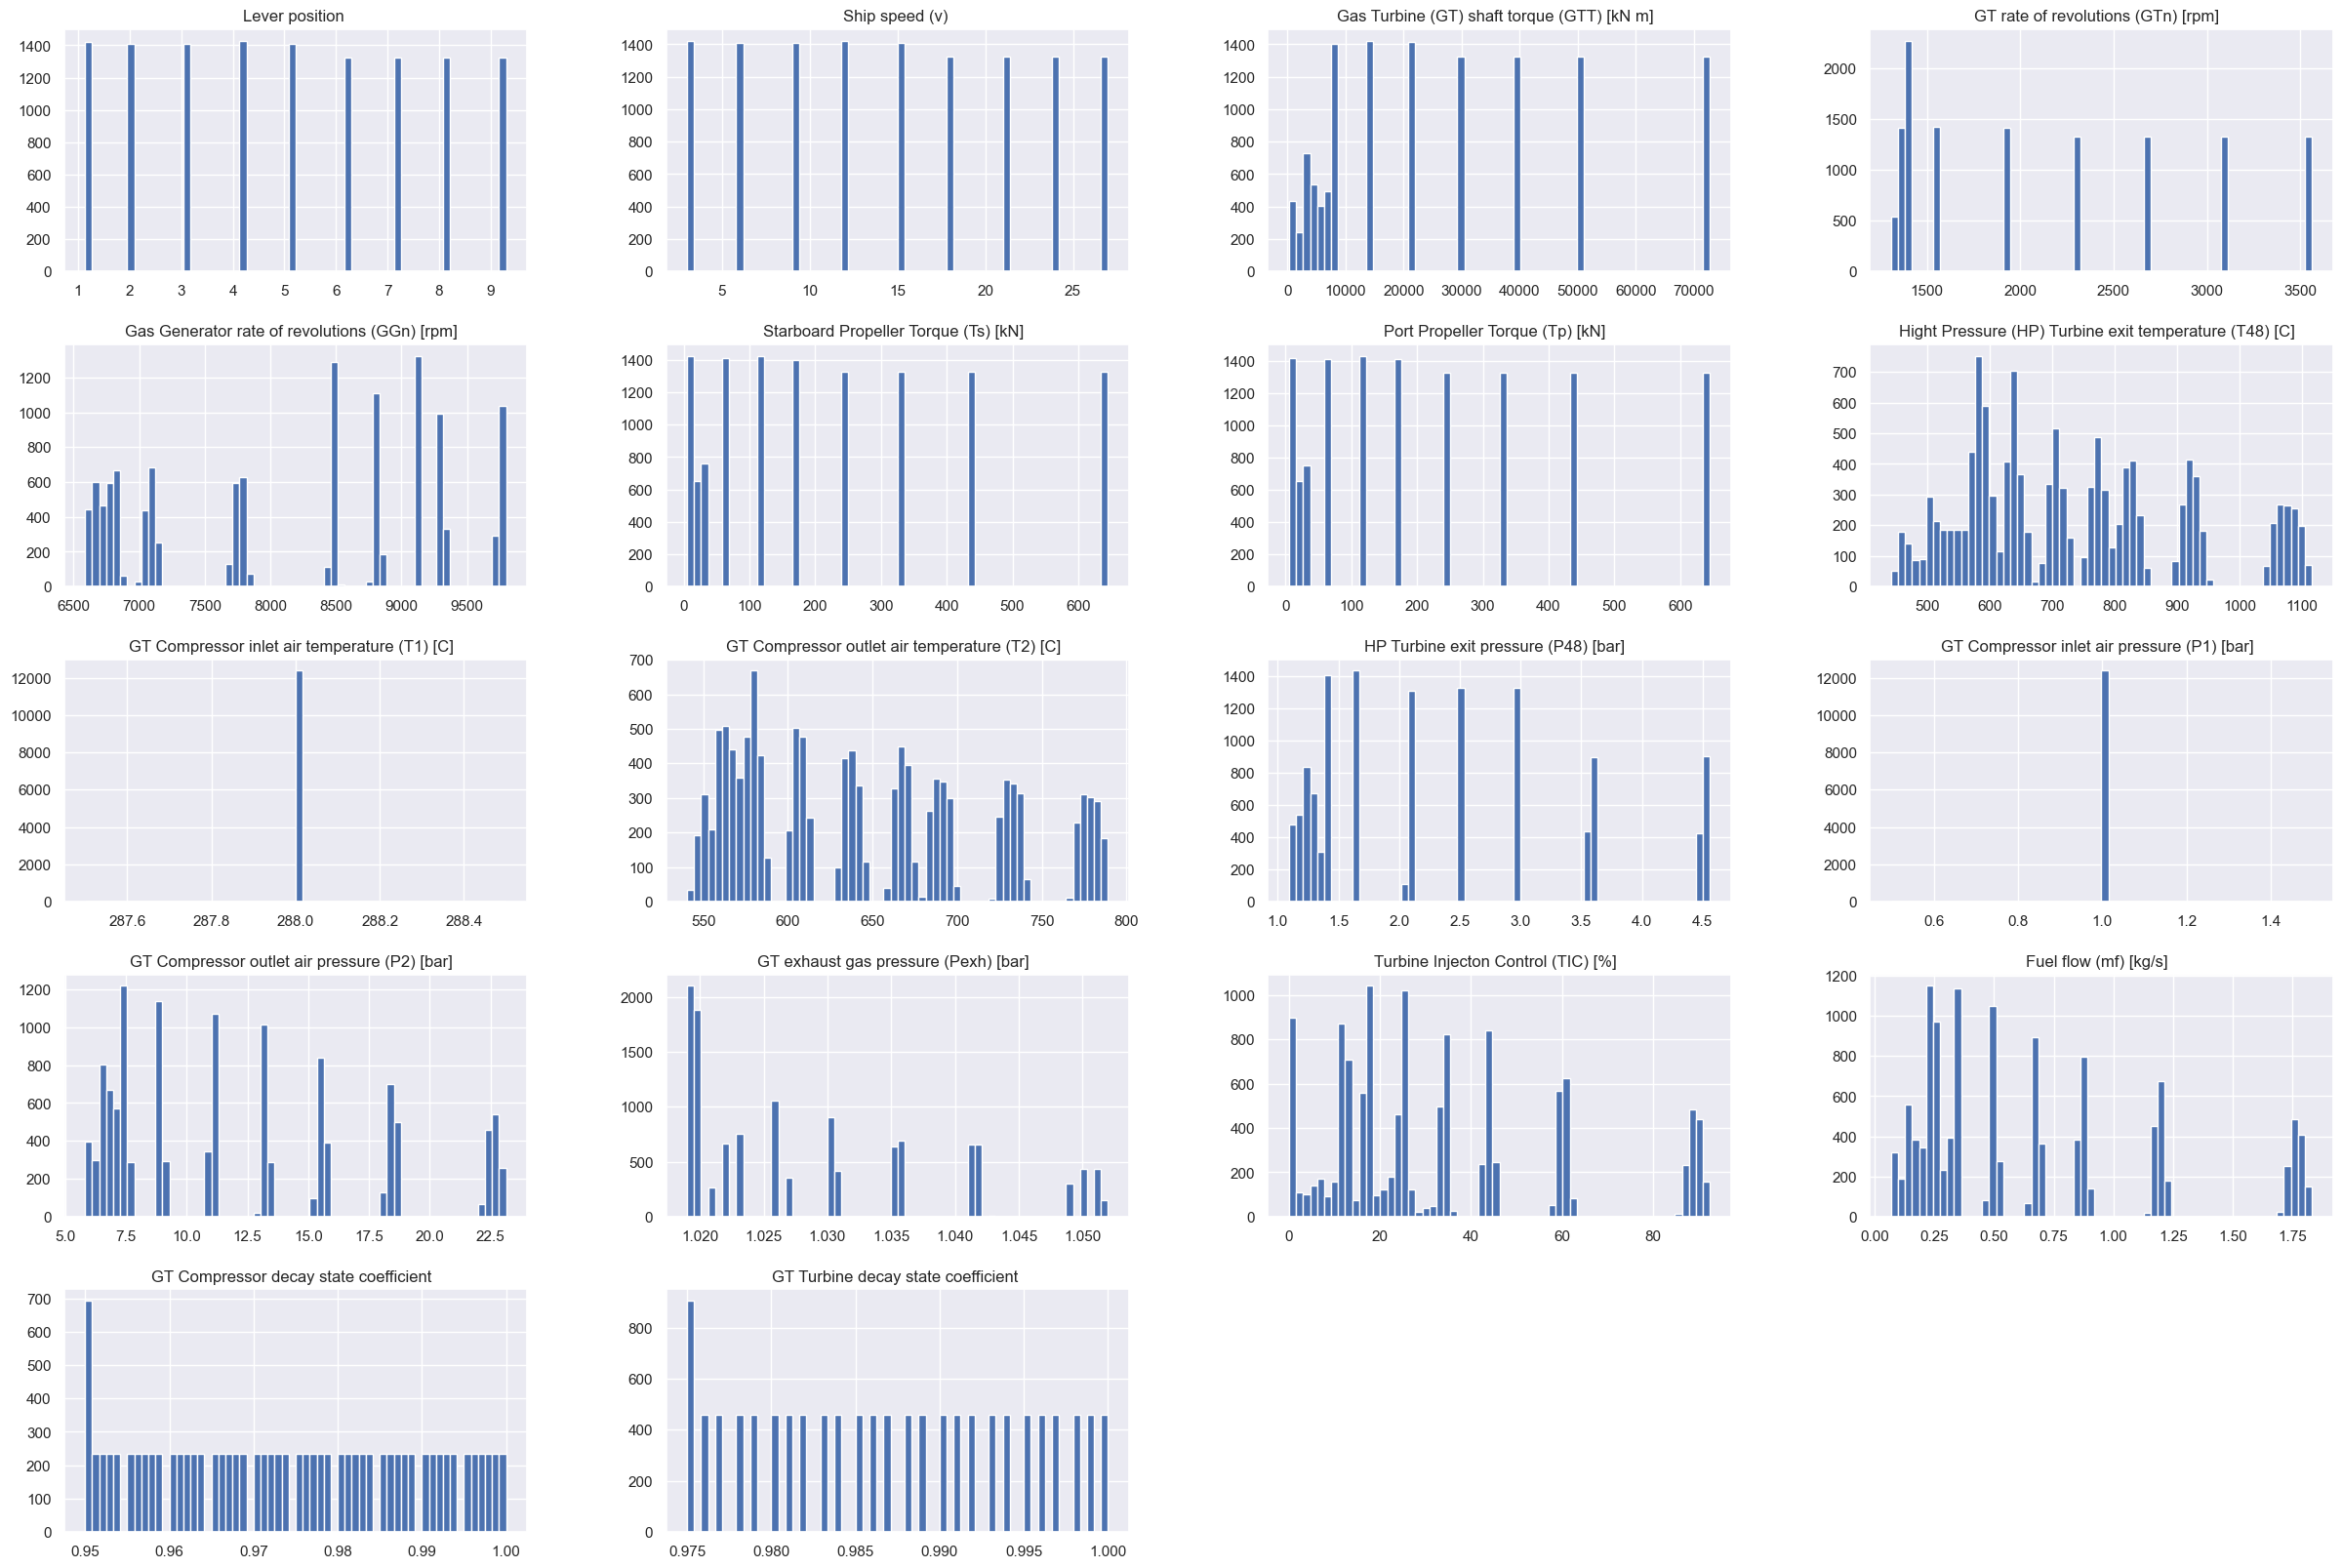

In [13]:
data.hist(figsize=(30, 20), bins=60)
plt.show()

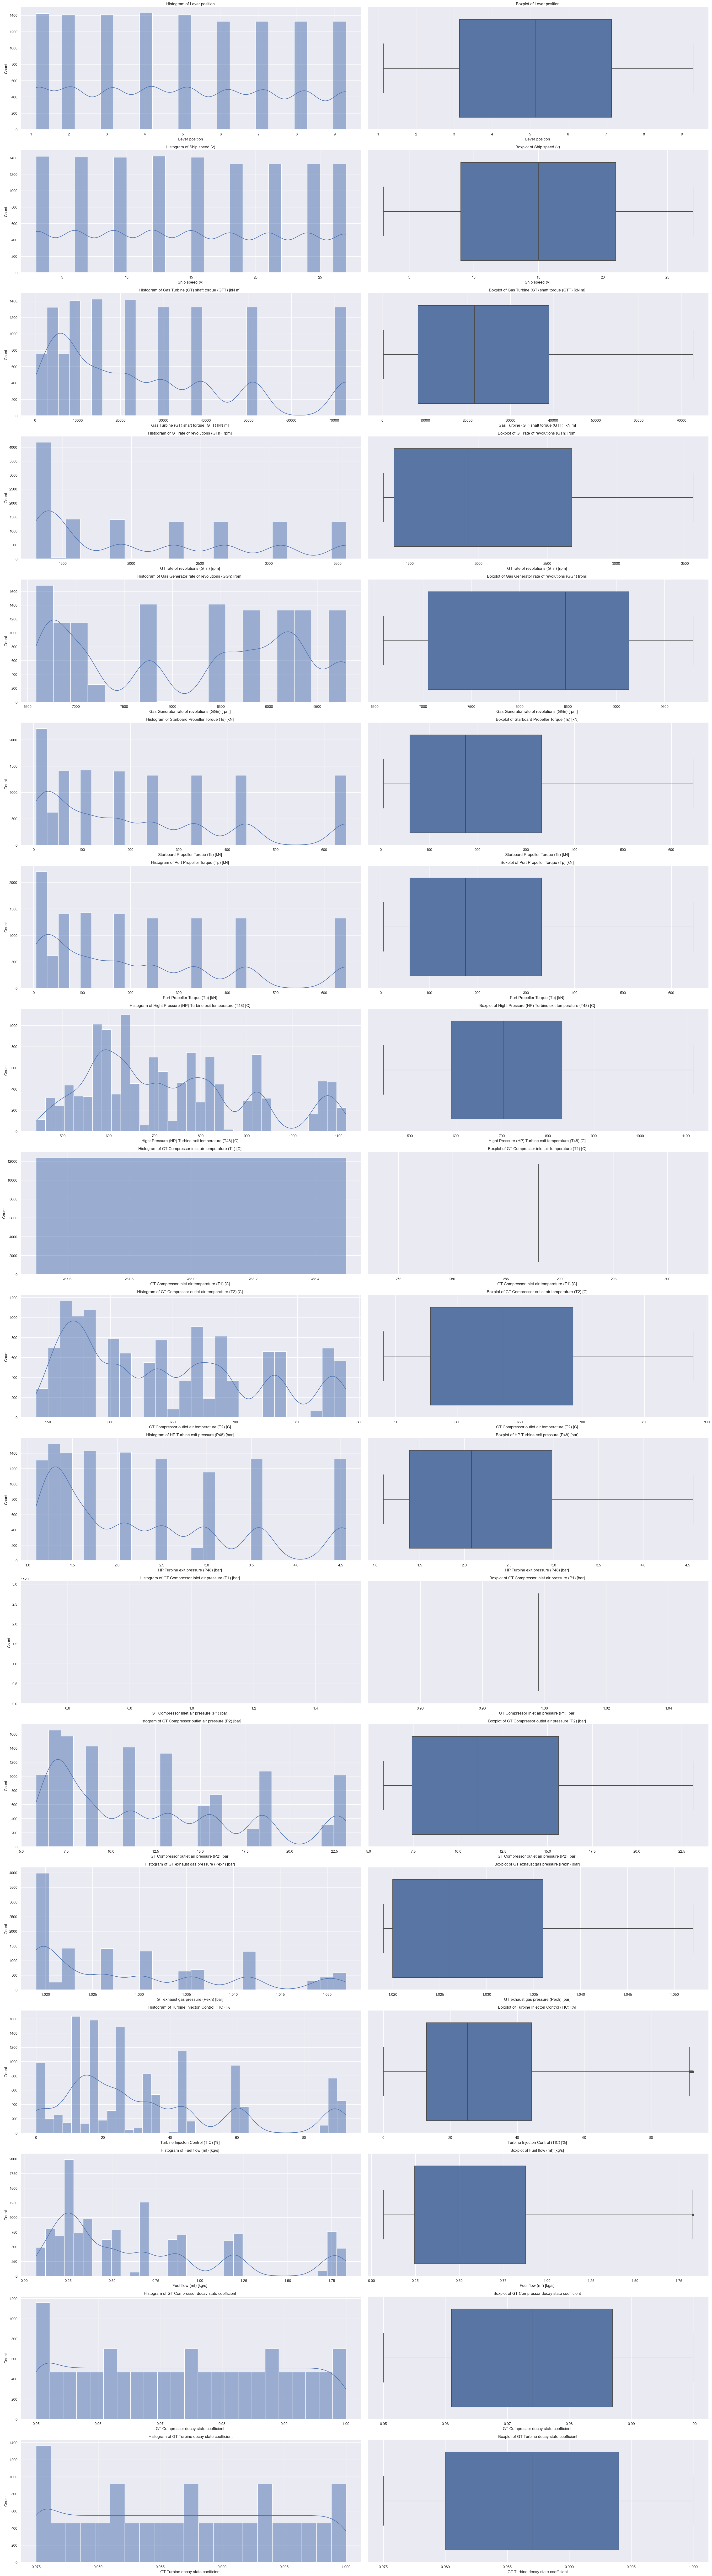

In [14]:
n_columns = len(data.columns)
fig, ax = plt.subplots(nrows=n_columns, ncols=2, figsize=(30, 6 * n_columns))

for i, column in enumerate(data.columns):
    # Histogram
    sns.histplot(data=data, x=column, kde=True, ax=ax[i, 0])
    ax[i, 0].set_title(f'Histogram of {column}')
    
    # Boxplot
    sns.boxplot(data=data, x=column, ax=ax[i, 1])
    ax[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## Imputing missing values

In [15]:
data.isnull().sum()

Lever position                                              48
Ship speed (v)                                              62
Gas Turbine (GT) shaft torque (GTT) [kN m]                  50
GT rate of revolutions (GTn) [rpm]                          62
Gas Generator rate of revolutions (GGn) [rpm]               50
Starboard Propeller Torque (Ts) [kN]                        49
Port Propeller Torque (Tp) [kN]                             58
Hight Pressure (HP) Turbine exit temperature (T48) [C]      66
GT Compressor inlet air temperature (T1) [C]                58
GT Compressor outlet air temperature (T2) [C]               48
HP Turbine exit pressure (P48) [bar]                        50
GT Compressor inlet air pressure (P1) [bar]                 60
GT Compressor outlet air pressure (P2) [bar]                43
GT exhaust gas pressure (Pexh) [bar]                        57
Turbine Injecton Control (TIC) [%]                          64
Fuel flow (mf) [kg/s]                                  

In [16]:
data['Lever position '].fillna(data['Lever position '].mean(), inplace=True)
data['Ship speed (v) '].fillna(data['Ship speed (v) '].mean(), inplace=True)
data['Gas Turbine (GT) shaft torque (GTT) [kN m]\xa0 '].fillna(data['Gas Turbine (GT) shaft torque (GTT) [kN m]\xa0 '].mean(), inplace=True)
data['GT rate of revolutions (GTn) [rpm]\xa0 '].fillna(data['GT rate of revolutions (GTn) [rpm]\xa0 '].mean(), inplace=True)
data['Gas Generator rate of revolutions (GGn) [rpm]\xa0 '].fillna(data['Gas Generator rate of revolutions (GGn) [rpm]\xa0 '].mean(), inplace=True)
data['Port Propeller Torque (Tp) [kN]\xa0 '].fillna(data['Port Propeller Torque (Tp) [kN]\xa0 '].mean(), inplace=True)
data['Starboard Propeller Torque (Ts) [kN]\xa0 '].fillna(data['Starboard Propeller Torque (Ts) [kN]\xa0 '].mean(), inplace=True)
data['Hight Pressure (HP) Turbine exit temperature (T48) [C]\xa0 '].fillna(data['Hight Pressure (HP) Turbine exit temperature (T48) [C]\xa0 '].mean(), inplace=True)
data['GT Compressor outlet air temperature (T2) [C]\xa0 '].fillna(data['GT Compressor outlet air temperature (T2) [C]\xa0 '].mean(), inplace=True)
data['HP Turbine exit pressure (P48) [bar]\xa0 '].fillna(data['HP Turbine exit pressure (P48) [bar]\xa0 '].mean(), inplace=True)
data['GT Compressor outlet air pressure (P2) [bar]\xa0 '].fillna(data['GT Compressor outlet air pressure (P2) [bar]\xa0 '].mean(), inplace=True)
data['GT exhaust gas pressure (Pexh) [bar]\xa0 '].fillna(data['GT exhaust gas pressure (Pexh) [bar]\xa0 '].mean(), inplace=True)
data['Turbine Injecton Control (TIC) [%]\xa0 '].fillna(data['Turbine Injecton Control (TIC) [%]\xa0 '].mean(), inplace=True)
data['Fuel flow (mf) [kg/s]\xa0 '].fillna(data['Fuel flow (mf) [kg/s]\xa0 '].mean(), inplace=True)
data['GT Compressor decay state coefficient\xa0 '].fillna(data['GT Turbine decay state coefficient '].mean(), inplace=True)
data['GT Turbine decay state coefficient '].fillna(data['GT Turbine decay state coefficient '].mean(), inplace=True)

In [17]:
#Drop duplicates
data.drop_duplicates(inplace=True)

In [18]:
data.duplicated().sum()

0

#### Renaming columns

In [19]:
rename_cols = {
    'Lever position ' : 'Lever_position',
    'Ship speed (v) ' : 'Ship_speed_v',
    'Gas Turbine (GT) shaft torque (GTT) [kN m]\xa0 ' : 'GT_shaft_torque_KNm',
    'GT rate of revolutions (GTn) [rpm]\xa0 ' :  'GTn_rate_of_revolution_rpm',
    'Gas Generator rate of revolutions (GGn) [rpm]\xa0 ' : 'GGn_rate_of_revolution_rpm',
    'Starboard Propeller Torque (Ts) [kN]\xa0 ' : 'Starboard_propeller_torque_KNm',
    'Port Propeller Torque (Tp) [kN]\xa0 ' : 'Port_propeller_torque_KNm',
    'Hight Pressure (HP) Turbine exit temperature (T48) [C]\xa0 ' : 'HP_turbine_exit_temp_T48_C',
    'GT Compressor inlet air temperature (T1) [C]\xa0 ' : 'GT_Compressor_inlet_air_temp_T1_C',
    'GT Compressor outlet air temperature (T2) [C]\xa0 ' : 'GT_Compressor_oulter_air_temp_T2_C',
    'HP Turbine exit pressure (P48) [bar]\xa0 ' : 'HP_Turbine_exit_pressure',
    'GT Compressor inlet air pressure (P1) [bar]\xa0 ' : 'GT_Compressor_inlet_air_pressure_P1',
    'GT Compressor outlet air pressure (P2) [bar]\xa0 ' : 'GT_compressor_outlet_air_pressure_P2',
    'GT exhaust gas pressure (Pexh) [bar]\xa0 ' : 'GT_exhaust_gas_pressure',
    'Turbine Injecton Control (TIC) [%]\xa0 ' : 'Turbine_Injection_Control_TIC',
    'Fuel flow (mf) [kg/s]\xa0 ' : 'Fuel_flow_kg_s',
    'GT Compressor decay state coefficient\xa0 ' : 'GT_Compressor_decay_state_coefficient',
    'GT Turbine decay state coefficient ' : 'GT_Turbine_decay_state_coefficient'
}

In [20]:
data.rename(columns=rename_cols, inplace=True)

#### Dropping features with constant values
#### **'GT_Compressor_inlet_air_temp_T1_C' : 288.0**
#### **'GT_Compressor_inlet_air_pressure_P1' : 0.998**

In [21]:
data.drop(['GT_Compressor_inlet_air_temp_T1_C', 'GT_Compressor_inlet_air_pressure_P1'], 
          axis=1, inplace=True)

### Checking multicolinearity using correlation heatmap and Variance Inflation Factor(VIF)

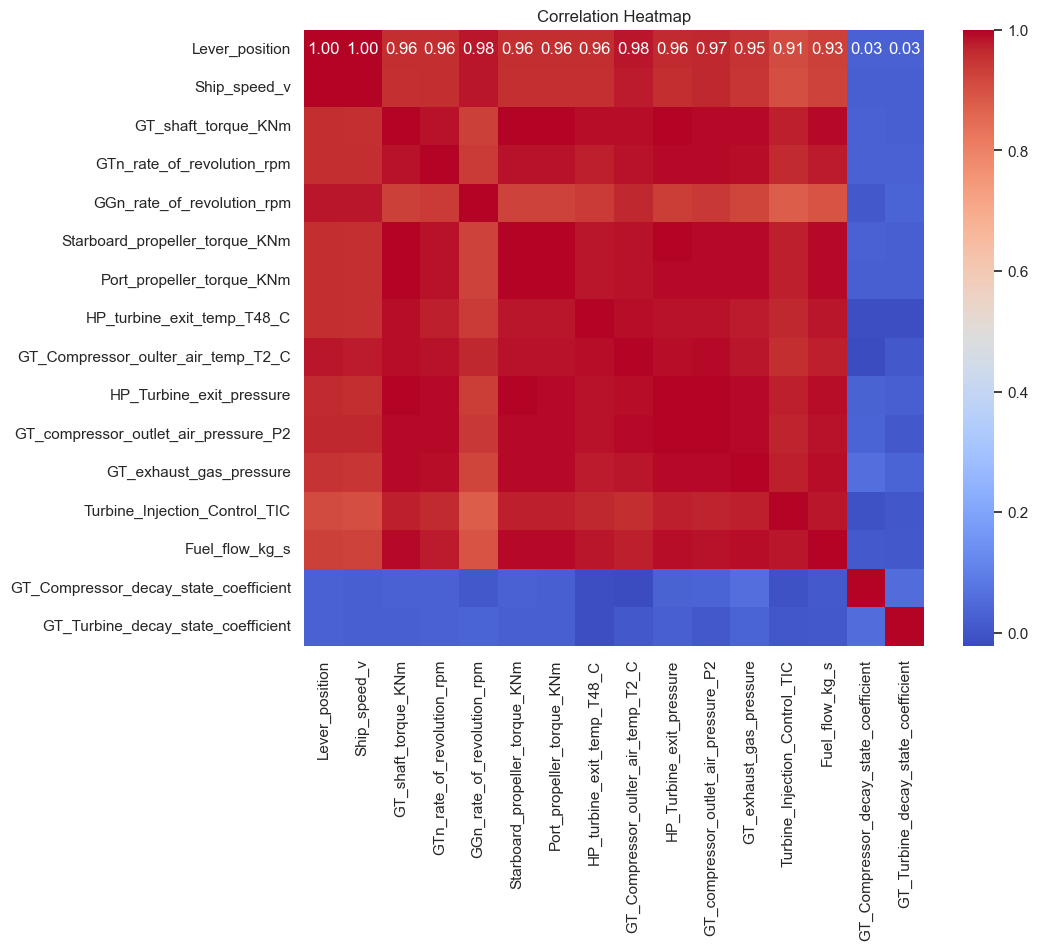

In [22]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
### VIF calculation
def calculate_vif(x):
    vif = pd.DataFrame()
    vif['Attributes'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return (vif)

In [24]:
X = data.iloc[:,:-1]
calculate_vif(X)

,Attributes,VIF
0,Lever_position,1165.717142
1,Ship_speed_v,1049.193722
2,GT_shaft_torque_KNm,992.054840
3,GTn_rate_of_revolution_rpm,1118.328916
4,GGn_rate_of_revolution_rpm,2938.151646
5,Starboard_propeller_torque_KNm,863.257545
6,Port_propeller_torque_KNm,799.094752
7,HP_turbine_exit_temp_T48_C,2468.217341
8,GT_Compressor_oulter_air_temp_T2_C,27803.053164
9,HP_Turbine_exit_pressure,2132.985259


### Observations
- Based on VIF calculation it is evident that this dataset exhibits multicollinearity.
- to reduce multicollinearity we will drop attributes with high collinearity, followed by feature engineering techniques.


dropping columns **GT_Compressor_oulter_air_temp_T2_C  &  GT_exhaust_gas_pressure**

In [25]:
data.drop(['GT_Compressor_oulter_air_temp_T2_C', 'GT_exhaust_gas_pressure'], axis=1, inplace=True)

In [26]:
data.columns.to_list()

['Lever_position',
 'Ship_speed_v',
 'GT_shaft_torque_KNm',
 'GTn_rate_of_revolution_rpm',
 'GGn_rate_of_revolution_rpm',
 'Starboard_propeller_torque_KNm',
 'Port_propeller_torque_KNm',
 'HP_turbine_exit_temp_T48_C',
 'HP_Turbine_exit_pressure',
 'GT_compressor_outlet_air_pressure_P2',
 'Turbine_Injection_Control_TIC',
 'Fuel_flow_kg_s',
 'GT_Compressor_decay_state_coefficient',
 'GT_Turbine_decay_state_coefficient']

In [27]:
data.shape[1]

14

# 4. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [28]:
data_feat = data.copy()

1 . creating feature **total_propeller_Torque** from  **Starboard Propeller Torque (Ts) [kN]** & **Port Propeller Torque (Tp) [kN]** 
as the two propellers in the ship have identical torque, total torque is calculated as follows : 

**total_propeller_torque = Torque1 + Torque2**

or

**total_propeller_Torque = 2*Torque**

In [29]:
data_feat['total_propeller_Torque'] =  data_feat['Starboard_propeller_torque_KNm']*2

2 . creating feature **total_Torque**

adding **total_propeller_torque** with **GT_shaft_torque_KNm**

In [30]:
data_feat['total_torque'] = data_feat['total_propeller_Torque'] + data_feat['GT_shaft_torque_KNm']

3 . creating feature **total_power**

using features **GT_shaft_torque_KNm** and **GTn_rate_of_revolution_rpm**

calculate Angular speed ('𝜔' omega) from GTn_rate_of_revolution_rpm

***𝜔  = (rpm * 2 * pi)/60***

Power Calculation : 

total_power = Angular speed * torque

***p = 𝜔 * T***

In [31]:
def total_power_calculations(data_feat):
    omega = (data_feat['GTn_rate_of_revolution_rpm']* 2 * np.pi)/60
    power = data_feat['GT_shaft_torque_KNm'] * omega
    return power

In [32]:
data_feat['total_power'] = data_feat.apply(total_power_calculations, axis=1)

4 . creating freature **total_pressure** from **HP_Turbine_exit_pressure**  & **GT_compressor_outlet_air_pressure_P2**


In [33]:
data_feat['total_pressure'] = data_feat['HP_Turbine_exit_pressure'] + data_feat['GT_compressor_outlet_air_pressure_P2']

5 . creating feature **ship_speed_ms**  

since ship speed is recorded in knots,
we need to convert speed to m/s inorder to align with other features

In [34]:
data_feat['ship_speed_ms'] = data_feat['Ship_speed_v'] * 0.51444

6 . creating feature **fuel_efficiency**

using **ship_speed_ms**   and **Fuel_flow_kg_s**

In [35]:
data_feat['fuel_efficiency'] = data_feat['ship_speed_ms']/data_feat['Fuel_flow_kg_s']

7 . creating a new feature **system_efficiency** using 

**total_power** and **Fuel_flow_kg_s**    


In [36]:
data_feat['system_efficiency'] = data_feat['total_power']/data_feat['Fuel_flow_kg_s']

8 . creating a new feature **GT_thermal_load**

which is calculated as :

**thermal_load = fuel_flow * absorbed air**

where **absorbed air = escape_gas_pressure * (outlet_air_temperature - inlet_air_temperature)**

since we have the constant value for inlet air temperature recorded as 288.0 C

In [37]:
data_feat['GT_Thermal_load'] = (data_feat['Fuel_flow_kg_s'] * data_feat['total_pressure'] 
                                * (data_feat['HP_turbine_exit_temp_T48_C'] - 288.0))

9 . creating feature **compressor_turbine_decay_ratio**

In [38]:
data_feat['compressor_turbine_decay_ratio'] = (data_feat['GT_Compressor_decay_state_coefficient']
                                               /data_feat['GT_Turbine_decay_state_coefficient'])

10 . creating feature **compr_turb_decay_diff_abs**

In [39]:
data_feat['compr_turb_decay_diff_abs'] = abs(data_feat['GT_Compressor_decay_state_coefficient']
                                            - data_feat['GT_Turbine_decay_state_coefficient'])

11 . creating a new feature **diff_comp_turb_decay_speed_norm**

Normalized Difference between Compressor Decay Coefficient and Turbine Decay Coefficient, Normalized by Speed, considering the influence of ship speed.'

In [40]:
data_feat['diff_comp_turb_decay_speed_norm'] = (data_feat['GT_Compressor_decay_state_coefficient']
                                            - data_feat['GT_Turbine_decay_state_coefficient'])/data_feat['ship_speed_ms']

In [41]:
data_feat.columns.to_list()

['Lever_position',
 'Ship_speed_v',
 'GT_shaft_torque_KNm',
 'GTn_rate_of_revolution_rpm',
 'GGn_rate_of_revolution_rpm',
 'Starboard_propeller_torque_KNm',
 'Port_propeller_torque_KNm',
 'HP_turbine_exit_temp_T48_C',
 'HP_Turbine_exit_pressure',
 'GT_compressor_outlet_air_pressure_P2',
 'Turbine_Injection_Control_TIC',
 'Fuel_flow_kg_s',
 'GT_Compressor_decay_state_coefficient',
 'GT_Turbine_decay_state_coefficient',
 'total_propeller_Torque',
 'total_torque',
 'total_power',
 'total_pressure',
 'ship_speed_ms',
 'fuel_efficiency',
 'system_efficiency',
 'GT_Thermal_load',
 'compressor_turbine_decay_ratio',
 'compr_turb_decay_diff_abs',
 'diff_comp_turb_decay_speed_norm']

In [42]:
data_feat.shape[1]

25

## Dropping redundant columns

In [43]:
drop_cols = [
        'Ship_speed_v', 'GT_shaft_torque_KNm', 'Starboard_propeller_torque_KNm', 'Port_propeller_torque_KNm',
        'GTn_rate_of_revolution_rpm', 'GGn_rate_of_revolution_rpm', 'Fuel_flow_kg_s', 'total_propeller_Torque',
        'HP_turbine_exit_temp_T48_C', 'GT_compressor_outlet_air_pressure_P2', 'total_pressure',
        'HP_Turbine_exit_pressure', 'ship_speed_ms', 'total_power', 'GT_Compressor_decay_state_coefficient'
]
data_feat.drop(columns=drop_cols, axis=1, inplace=True)

In [44]:
data_feat.columns.to_list()

['Lever_position',
 'Turbine_Injection_Control_TIC',
 'GT_Turbine_decay_state_coefficient',
 'total_torque',
 'fuel_efficiency',
 'system_efficiency',
 'GT_Thermal_load',
 'compressor_turbine_decay_ratio',
 'compr_turb_decay_diff_abs',
 'diff_comp_turb_decay_speed_norm']

In [45]:
# re-arranging
new_order = [
    'Lever_position', 'total_torque', 'GT_Thermal_load', 'Turbine_Injection_Control_TIC',
    'fuel_efficiency', 'system_efficiency', 'compressor_turbine_decay_ratio', 'compr_turb_decay_diff_abs',
    'diff_comp_turb_decay_speed_norm', 'GT_Turbine_decay_state_coefficient'
]
data_feat = data_feat[new_order]

In [46]:
data_feat.columns.to_list()

['Lever_position',
 'total_torque',
 'GT_Thermal_load',
 'Turbine_Injection_Control_TIC',
 'fuel_efficiency',
 'system_efficiency',
 'compressor_turbine_decay_ratio',
 'compr_turb_decay_diff_abs',
 'diff_comp_turb_decay_speed_norm',
 'GT_Turbine_decay_state_coefficient']

In [47]:
data_feat.shape

(12287, 10)

In [48]:
# checking VIF post feature engineering
x = data_feat.iloc[:,:-1]
calculate_vif(x)

,Attributes,VIF
0,Lever_position,366.632026
1,total_torque,898.041057
2,GT_Thermal_load,99.061303
3,Turbine_Injection_Control_TIC,82.930512
4,fuel_efficiency,26.315095
5,system_efficiency,175.379581
6,compressor_turbine_decay_ratio,32.185511
7,compr_turb_decay_diff_abs,4.931762
8,diff_comp_turb_decay_speed_norm,2.484325


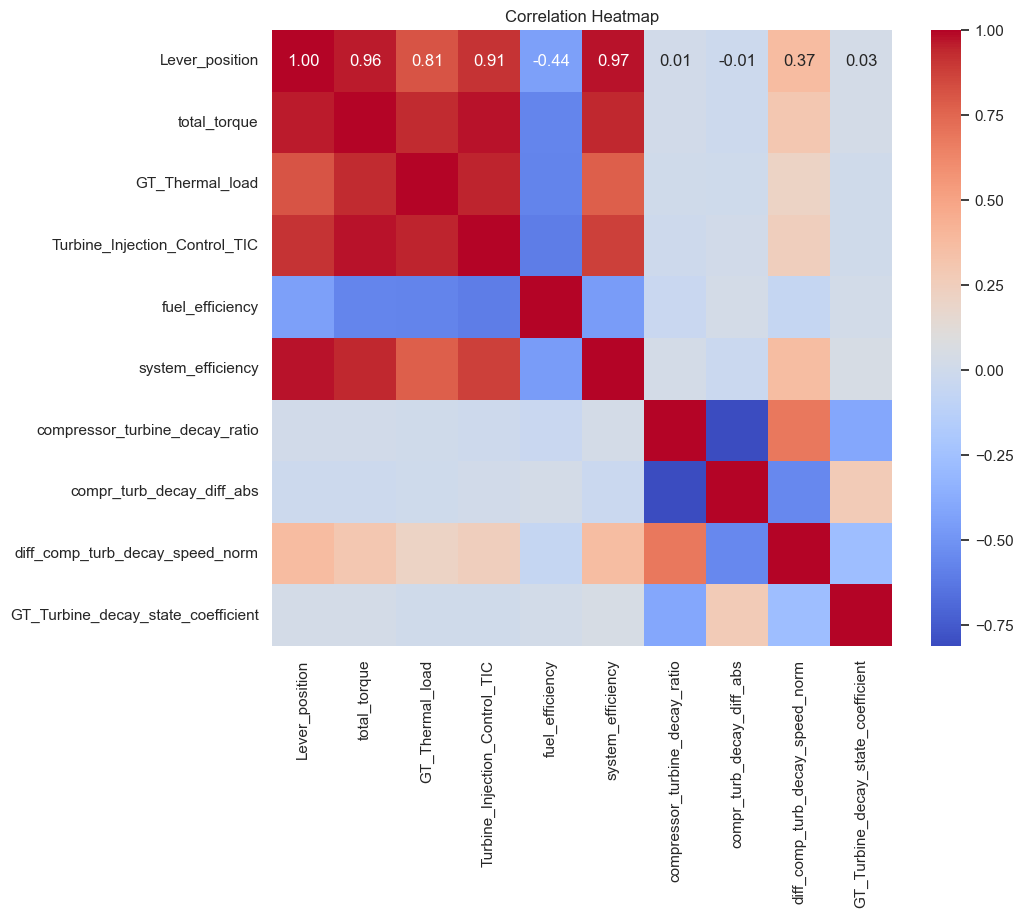

In [49]:
correlation_matrix = data_feat.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

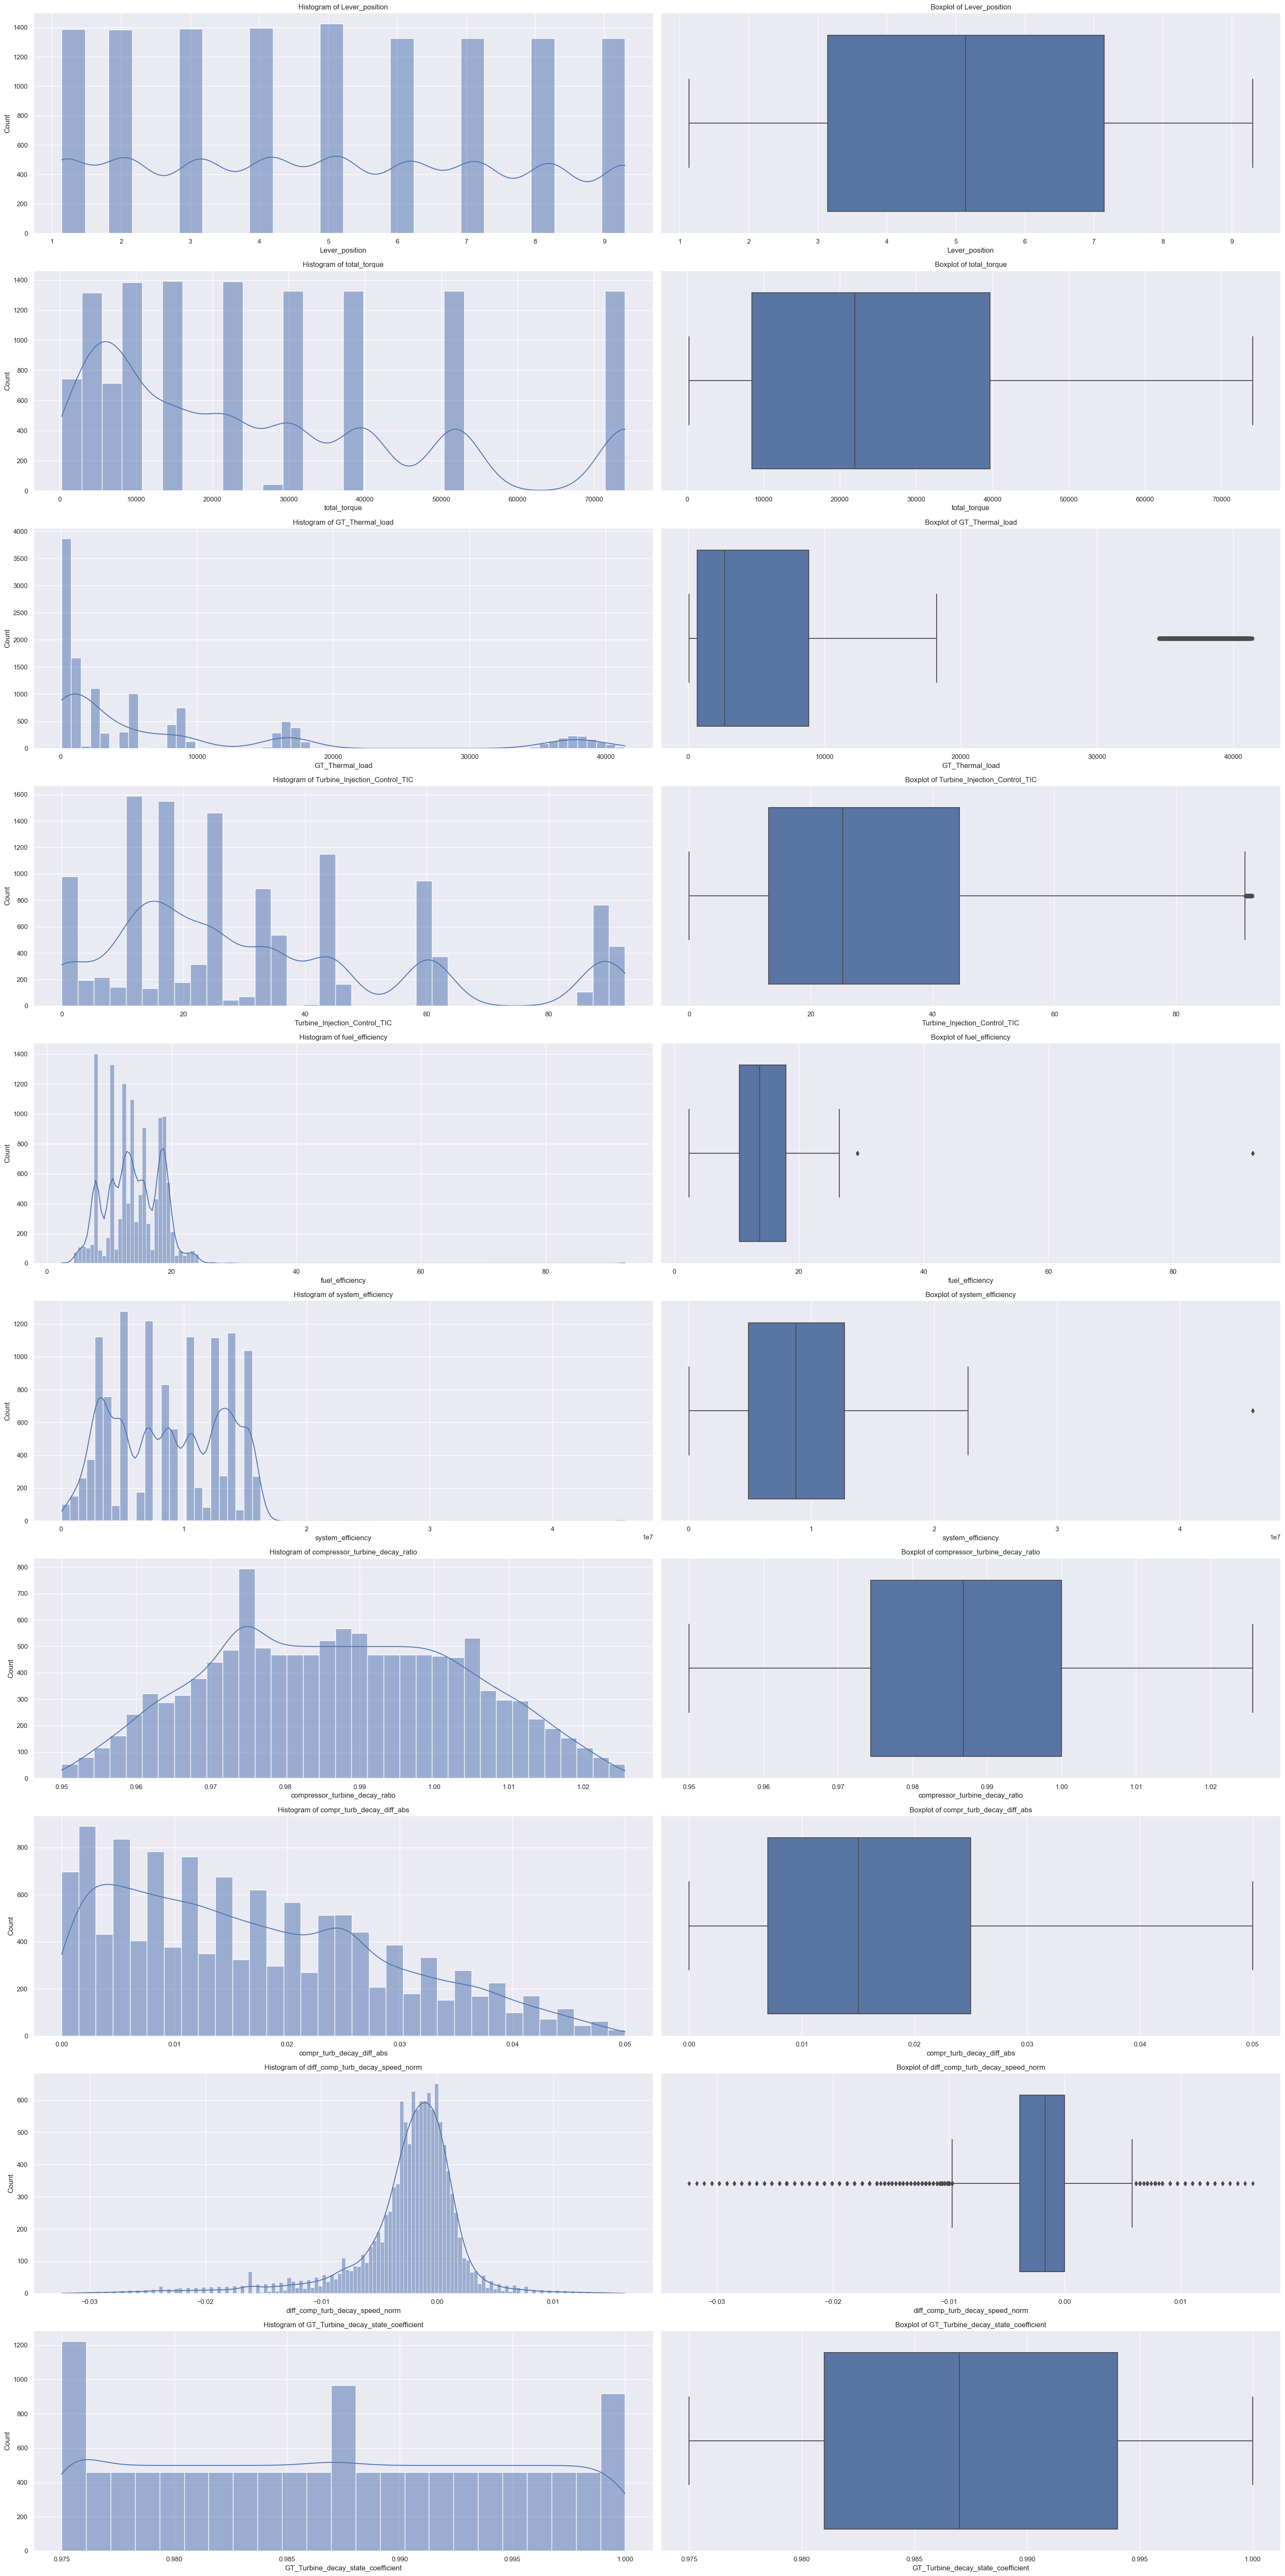

In [50]:
n_columns = len(data_feat.columns)
fig, ax = plt.subplots(nrows=n_columns, ncols=2, figsize=(30, 6 * n_columns))

for i, column in enumerate(data_feat.columns):
    # Histogram
    sns.histplot(data=data_feat, x=column, kde=True, ax=ax[i, 0])
    ax[i, 0].set_title(f'Histogram of {column}')
    
    # Boxplot
    sns.boxplot(data=data_feat, x=column, ax=ax[i, 1])
    ax[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# 5. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [51]:
data_model = data_feat.copy()

#### Data Spliting

In [52]:
x = data_model.iloc[:, :-1] # independent variables
y = data_model.iloc[:, -1] # dependent variable

In [53]:
# Split the data into 50% training and 50% remaining
X_train, X_temp, Y_train, Y_temp = train_test_split(x, y, test_size=0.5, random_state=42)

# Split the remaining 50% into 30% validation and 20% testing
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.4, random_state=42)

# Reset indices
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_val = Y_val.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

#### Data Scaling

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 6. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [55]:
# function for adjusted-R2
def adjusted_r2(r_squared, n, k):
    """
    Parameters:
    r_squared (float): The R-squared value.
    n (int): The number of observations.
    k (int): The number of predictors.
    Returns:
    float: The adjusted R-squared value.
    """
    if n == k + 1:
        raise ValueError("Number of observations must be greater than number of predictors + 1")
    adj_r2 = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adj_r2

In [56]:
def predict_evaluate_model(model, X, Y):
    """ 
    This function does the prediciton and prints the evaluation metrics.
    parameters
    model : model for prediction
    X : independent variable
    Y : dependent variable
    """
    model_at_hand = model
    y_pred = model_at_hand.predict(X)
    print('mean_absolute_error : ', mean_absolute_error(Y, y_pred))
    print('mean_squared_error : ', mean_squared_error(Y, y_pred))
    print('root_mean_squared_error : ', sqrt(mean_squared_error(Y, y_pred)))
    R2_Score = r2_score(Y, y_pred)
    print('r2 : ', R2_Score)
    n = len(Y_train)
    k = X_train.shape[1]
    print("Adjusted-r2 :", adjusted_r2(R2_Score, n, k))

## 6.1 Linear Regression <a id='lr'></a>
[Back to top](#table_of_contents)

In [57]:
Linear_regression = LinearRegression()
Linear_regression.fit(X_train, Y_train)

LinearRegression()

### Training data

In [58]:
predict_evaluate_model(Linear_regression, X_train, Y_train)

mean_absolute_error :  0.00558616140485023
mean_squared_error :  4.58431370393091e-05
root_mean_squared_error :  0.0067707560168203595
r2 :  0.2100153420264027
Adjusted-r2 : 0.2088560624043968


### Validation data

In [59]:
predict_evaluate_model(Linear_regression, X_val, Y_val)

mean_absolute_error :  0.0056798149842715515
mean_squared_error :  4.708204754938275e-05
root_mean_squared_error :  0.006861635923697988
r2 :  0.21061102901829132
Adjusted-r2 : 0.20945262354970573


### Testing data

In [60]:
predict_evaluate_model(Linear_regression, X_test, Y_test)

mean_absolute_error :  0.0055671970779469305
mean_squared_error :  4.523092508424429e-05
root_mean_squared_error :  0.006725394046763675
r2 :  0.21355993539845142
Adjusted-r2 : 0.21240585736463202


## 6.2 Decision Tree  <a id='dt'></a>
[Back to top](#table_of_contents)

In [61]:
decision_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

### Training data

In [62]:
predict_evaluate_model(decision_tree, X_train, Y_train)

mean_absolute_error :  0.002390334067289128
mean_squared_error :  1.4044066321032741e-05
root_mean_squared_error :  0.003747541370156271
r2 :  0.7579878331697439
Adjusted-r2 : 0.7576326873191859


### Validation data

In [63]:
predict_evaluate_model(decision_tree, X_val, Y_val)

mean_absolute_error :  0.0026172378441787804
mean_squared_error :  1.494487783061755e-05
root_mean_squared_error :  0.0038658605549887013
r2 :  0.7494305718164713
Adjusted-r2 : 0.7490628684325398


### Testing data

In [64]:
predict_evaluate_model(decision_tree, X_test, Y_test)

mean_absolute_error :  0.0026104245362074444
mean_squared_error :  1.5234079374965151e-05
root_mean_squared_error :  0.0039030858785024385
r2 :  0.7351217038900215
Adjusted-r2 : 0.7347330026565322


## 6.3 Random Forest Regressor  <a id='rf'></a>
[Back to top](#table_of_contents)

In [65]:
randomForest_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, 
                                               min_samples_leaf=1, min_samples_split=10, random_state=42)
randomForest_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

### Training data

In [66]:
predict_evaluate_model(randomForest_regressor, X_train, Y_train)

mean_absolute_error :  0.002038594375669667
mean_squared_error :  1.0438312035670332e-05
root_mean_squared_error :  0.0032308376677992246
r2 :  0.8201234274990841
Adjusted-r2 : 0.8198594638348891


### Validation data

In [67]:
predict_evaluate_model(randomForest_regressor, X_val, Y_val)

mean_absolute_error :  0.00220252497676451
mean_squared_error :  1.1335816132292223e-05
root_mean_squared_error :  0.003366870376520638
r2 :  0.8099409711839237
Adjusted-r2 : 0.8096620650597847


### Testing data

In [68]:
predict_evaluate_model(randomForest_regressor, X_test, Y_test)

mean_absolute_error :  0.0021529996963315016
mean_squared_error :  1.0921473546691368e-05
root_mean_squared_error :  0.0033047652786077513
r2 :  0.8101059320452418
Adjusted-r2 : 0.8098272679963925


## 6.4 GradientBoostingRegressor <a id='gb'></a>
[Back to top](#table_of_contents)

In [69]:
gradient_booster = GradientBoostingRegressor(n_estimators=100, 
                                             max_depth=5,min_samples_split=10,
                                             min_samples_leaf=5,
                                             learning_rate=0.1, random_state=42)
gradient_booster.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                          random_state=42)

### Training data

In [70]:
predict_evaluate_model(gradient_booster, X_train, Y_train)

mean_absolute_error :  0.0009037341530340539
mean_squared_error :  1.8301940623864917e-06
root_mean_squared_error :  0.001352846651467376
r2 :  0.96846146830746
Adjusted-r2 : 0.9684151864249828


### Validation data

In [71]:
predict_evaluate_model(gradient_booster, X_val, Y_val)

mean_absolute_error :  0.0011894426085217534
mean_squared_error :  3.474499399171166e-06
root_mean_squared_error :  0.0018640009117946177
r2 :  0.9417457046125376
Adjusted-r2 : 0.9416602181200401


### Testing data

In [72]:
predict_evaluate_model(gradient_booster, X_test, Y_test)

mean_absolute_error :  0.001121713857572656
mean_squared_error :  2.9285985766142993e-06
root_mean_squared_error :  0.0017113148677593785
r2 :  0.9490798110033165
Adjusted-r2 : 0.9490050870996853


## 6.5 AdaBoostRegressor  <a id='ada'></a>
[Back to top](#table_of_contents)

In [73]:
base_estimator = DecisionTreeRegressor(max_depth=10)  
adaboost_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_regressor.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.1, n_estimators=100, random_state=42)

### Training data

In [74]:
predict_evaluate_model(adaboost_regressor, X_train, Y_train)

mean_absolute_error :  0.0009626935071293052
mean_squared_error :  2.215283092377512e-06
root_mean_squared_error :  0.001488382710319329
r2 :  0.9618254820880618
Adjusted-r2 : 0.961769462087865


### Validation data

In [75]:
predict_evaluate_model(adaboost_regressor, X_val, Y_val)

mean_absolute_error :  0.001291062008951697
mean_squared_error :  3.7369625934302967e-06
root_mean_squared_error :  0.001933122498299137
r2 :  0.9373451833603665
Adjusted-r2 : 0.9372532392302905


### Testing data

In [76]:
predict_evaluate_model(adaboost_regressor, X_test, Y_test)

mean_absolute_error :  0.0012438000442878696
mean_squared_error :  3.3406674398905956e-06
root_mean_squared_error :  0.0018277492825578118
r2 :  0.9419150788460212
Adjusted-r2 : 0.9418298409053094


## 6.6 XGBoostRegressor  <a id='xgb'></a>
[Back to top](#table_of_contents)

In [77]:
xgboost = XGBRegressor(n_estimators=100, max_depth=8, n_jobs=2)
xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=2,
             num_parallel_tree=None, random_state=None, ...)

### Training data

In [78]:
predict_evaluate_model(xgboost, X_train, Y_train)

mean_absolute_error :  0.00048627528766470243
mean_squared_error :  4.202867841805813e-07
root_mean_squared_error :  0.0006482952908826203
r2 :  0.9927574740104059
Adjusted-r2 : 0.9927468458131279


### Validation data

In [79]:
predict_evaluate_model(xgboost, X_val, Y_val)

mean_absolute_error :  0.0008485967150506137
mean_squared_error :  2.050097723709061e-06
root_mean_squared_error :  0.001431816232520452
r2 :  0.9656275668378009
Adjusted-r2 : 0.9655771262869352


### Testing data

In [80]:
predict_evaluate_model(xgboost, X_test, Y_test)

mean_absolute_error :  0.0008298904566087702
mean_squared_error :  1.6760296377170233e-06
root_mean_squared_error :  0.0012946156331965961
r2 :  0.970858503245174
Adjusted-r2 : 0.9708157389420934


## 8 Result Evaluation  <a id='res'></a>
[Back to top](#table_of_contents)

In [81]:
Model_evaluation_scores = {
    'Model': [
        'LinearRegression',
        'DecisionTreeRegressor',
        'RandomForestRegressor',
        'GradientBoostingRegressor',
        'AdaBoostRegressor',
        'XGBoostRegressor'
    ],
    'R² Score': [
        0.21223,
        0.75389,
        0.80337,
        0.94430,
        0.94989,
        0.97110
    ],
    'Adjusted R² Score': [
        0.21108,
        0.75353,
        0.80308,
        0.94422,
        0.94981,
        0.97106
    ]
}

result = pd.DataFrame(Model_evaluation_scores)
result.index = result.index + 1
result

,Model,R² Score,Adjusted R² Score
1,LinearRegression,0.21223,0.21108
2,DecisionTreeRegressor,0.75389,0.75353
3,RandomForestRegressor,0.80337,0.80308
4,GradientBoostingRegressor,0.94430,0.94422
5,AdaBoostRegressor,0.94989,0.94981
6,XGBoostRegressor,0.97110,0.97106


## Conclusion
- Linear Regression has not given good predictions, due to several inherent limitations.
- 
We can Observe that  GradientBoosting, AdaBoost & XGBoost has given good result
- 
**XgboostRegressor** has good prediction with high R2 score, we will use this algorithm.
- Can Observe that **R2** and **Adjusted R2** values are closely similar, This indicates that these models are well-balanced and do not suffer significantly from adding irrelevant variables.it generally means that the model has good explanatory power, and is not overfitting, The predictors included are contributing meaningfully to the prediction of the target variable.

## Ajith Devadiga